In [2]:
import sys
sys.path.append('/home/youzhi/python-projects/sp-project/code')

In [3]:
spdir = "/home/youzhi/python-projects/sp-project"

In [4]:
import torch 
import os
import PmPNet as PN
import matplotlib.pyplot as plt

# Device configuration
cuda = torch.cuda.is_available()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
batch_size = 200
num_epochs = 80
learning_rate = 1e-3

# Paths for different folders, data and result folders
datadir= f"{spdir}/Data/combined_readindata"
wdir= f"{spdir}/Train_PN_result_sP"
if not os.path.exists(wdir):
    os.makedirs(wdir)

# Train 

In [11]:
# read in the training data 
train_loader, test_loader = PN.readin_data_train(datadir,"c_readindata",batch_size)

size of data:  727


/home/youzhi/miniconda3/envs/pmpnet/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/youzhi/miniconda3/envs/pmpnet/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


In [12]:
# train PmPNet
PN.NetTrain(wdir,"train_PN_log","net_PN_model",train_loader,learning_rate,num_epochs,batch_size,device)

Epoch [1/100], Step [1/3] Loss1: 4.627993,Loss2: 3.439418,Loss3: 0.420739
Epoch [2/100], Step [1/3] Loss1: 1.745970,Loss2: 2.525064,Loss3: 1.109388
Epoch [3/100], Step [1/3] Loss1: 0.843233,Loss2: 1.948972,Loss3: 0.399691
Epoch [4/100], Step [1/3] Loss1: 0.527347,Loss2: 1.786784,Loss3: 0.317096
Epoch [5/100], Step [1/3] Loss1: 0.402027,Loss2: 1.539755,Loss3: 0.294781
Epoch [6/100], Step [1/3] Loss1: 0.396053,Loss2: 1.426798,Loss3: 0.200520
Epoch [7/100], Step [1/3] Loss1: 0.355316,Loss2: 1.207115,Loss3: 0.138359
Epoch [8/100], Step [1/3] Loss1: 0.284296,Loss2: 0.920268,Loss3: 0.168956
Epoch [9/100], Step [1/3] Loss1: 0.288230,Loss2: 0.686585,Loss3: 0.159992
Epoch [10/100], Step [1/3] Loss1: 0.268555,Loss2: 0.399313,Loss3: 0.150200
Epoch [11/100], Step [1/3] Loss1: 0.267710,Loss2: 0.250746,Loss3: 0.140903
Epoch [12/100], Step [1/3] Loss1: 0.243022,Loss2: 0.165289,Loss3: 0.129481
Epoch [13/100], Step [1/3] Loss1: 0.242265,Loss2: 0.096296,Loss3: 0.109445
Epoch [14/100], Step [1/3] Loss1: 

In [13]:
# model evaluation on test data
PN.netevalu(wdir,"net_PN_model","prcurve_file","predict_PN_file",test_loader,device);

tensor([-5.0888, -4.5282, -5.3496, -3.1268,  1.4869, -4.1547,  2.7462, -2.0893,
        -0.5675, -3.9853, -1.0713, -2.5047, -1.3344, -2.9795, -2.3115, -1.7668,
        -5.4302, -1.9676, -3.9790, -5.2279, -2.8698, -3.8468, -3.2968, -9.0148,
        -1.7304, -1.0053, -0.3524, -2.2530, -3.4356, -9.8906, -1.4811, -1.5456,
         1.9154, -3.6152, -4.7632, -2.0830,  0.0632, -1.0865,  1.2584, -5.2682,
        -1.5198, -3.6155, -3.5693, -3.2748, -2.2787, -4.5099, -0.6258, -3.5553,
        -4.5392, -2.8468, -1.2033, -3.3835, -3.1668, -1.9459, -0.7001, -0.1915,
        -2.2963, -2.1040, -2.5974, -4.1894, -5.5397, -3.0900, -1.3219, -2.1965,
        -4.6478, -0.6806, -0.9148, -2.2068,  0.1531,  0.5287, -0.9426, -3.4709,
        -8.3128, -3.5968, -6.4513, -2.1311, -1.9950, -1.3229, -4.0823, -0.3695,
        -4.0163, -2.9068, -4.4528, -2.8327, -1.7574, -3.4767, -4.5615, -4.1578,
        -5.5303, -3.5151, -0.8621, -4.9302,  4.5486, -6.3129, -5.9311,  2.0524,
        -3.8341, -1.5279, -3.5801, -1.21

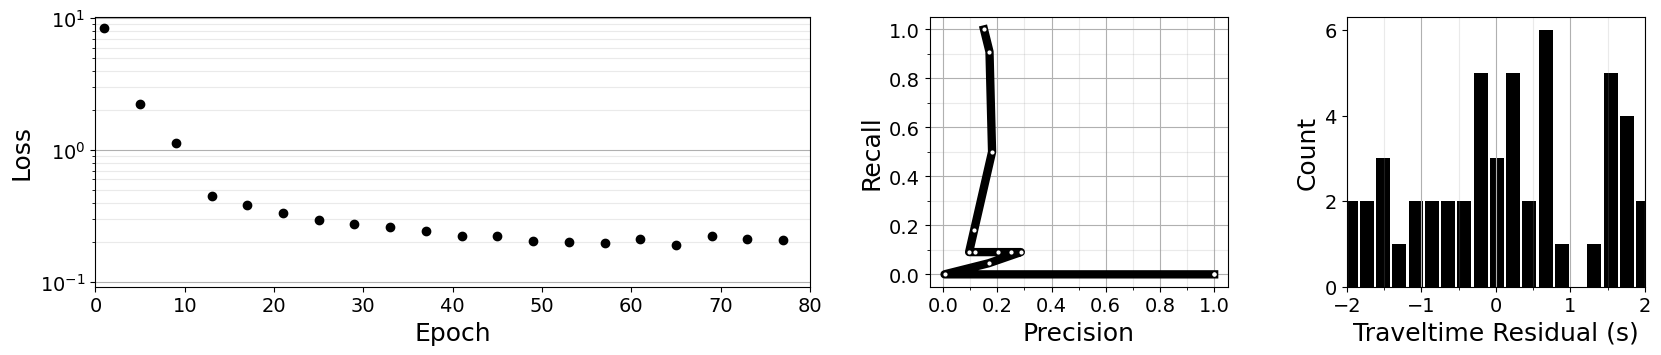

In [14]:
# quickly visualize the result
PN.plot_modeva(wdir,"train_PN_log","prcurve_file","predict_PN_file","plot_PN_modevalu")

## Verify latent variable

tensor([0.0000, 0.1695])


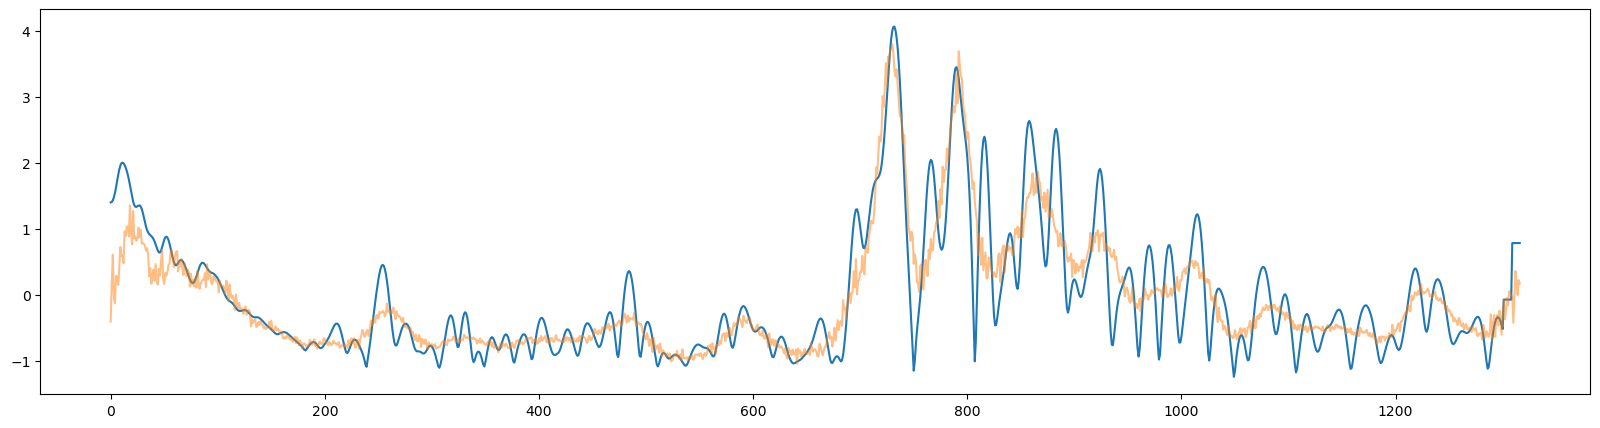

tensor([0.0000, 0.0125])


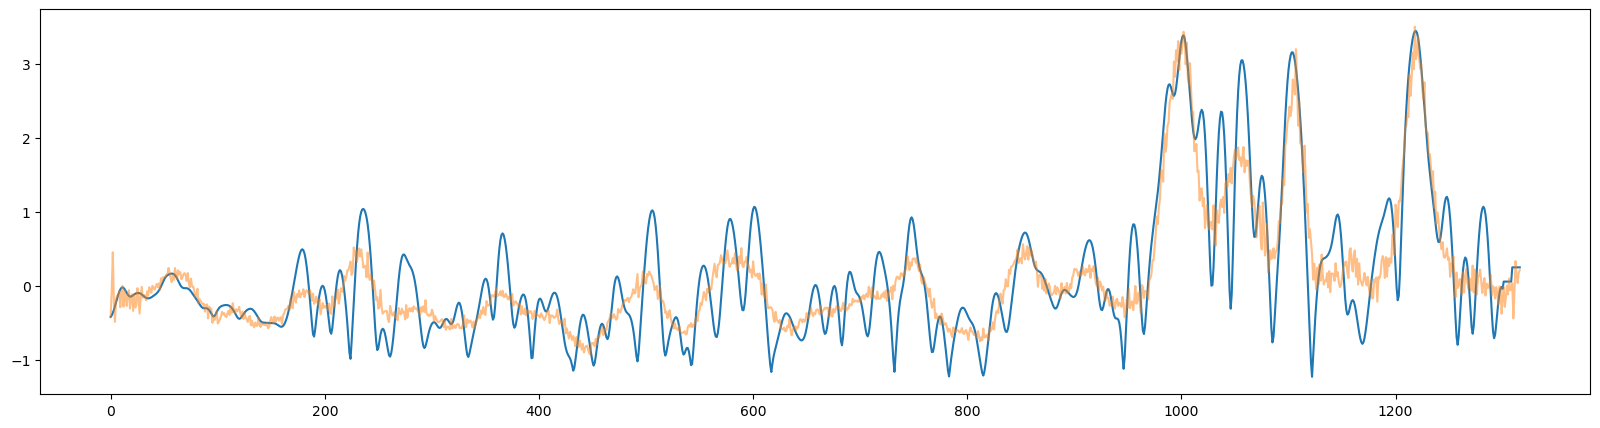

tensor([1.0000, 0.0032])


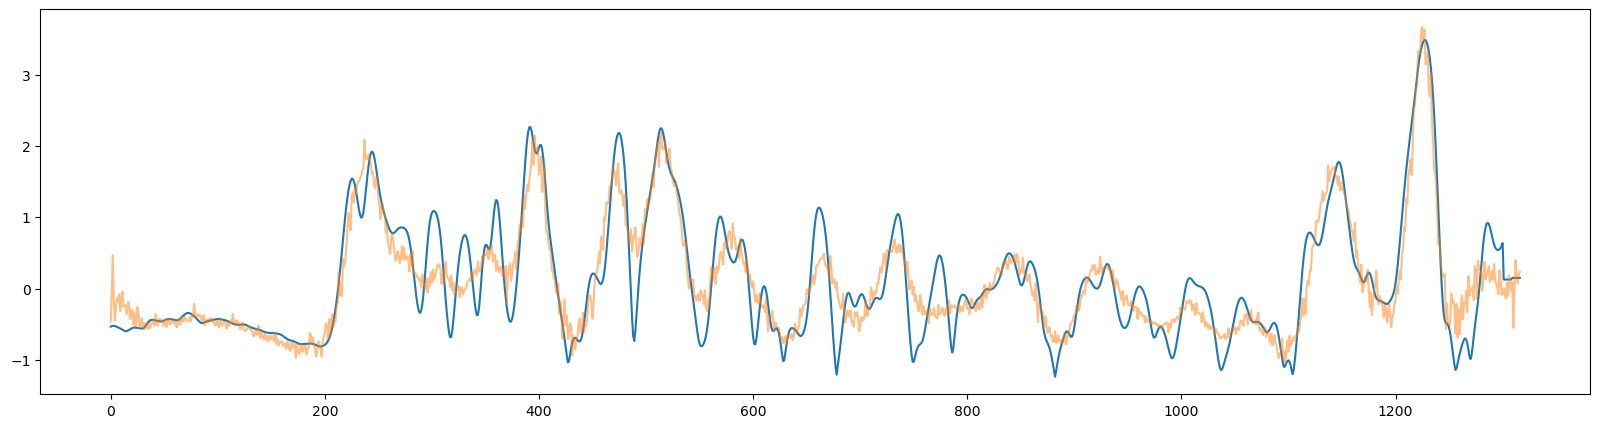

tensor([ 0.0000, -0.0695])


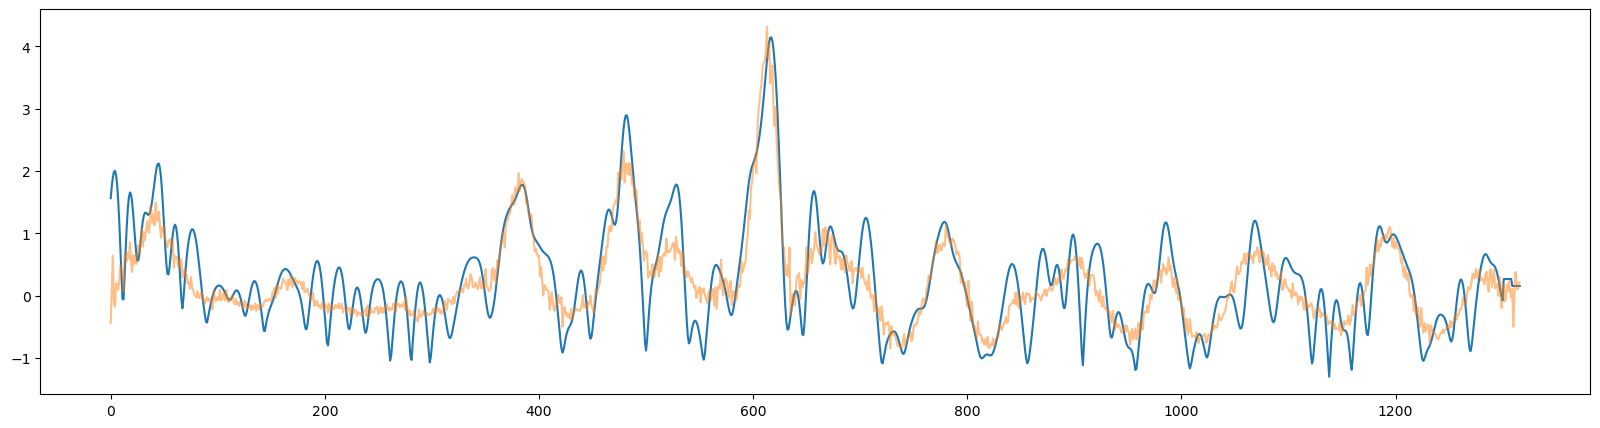

tensor([0.0000, 0.0504])


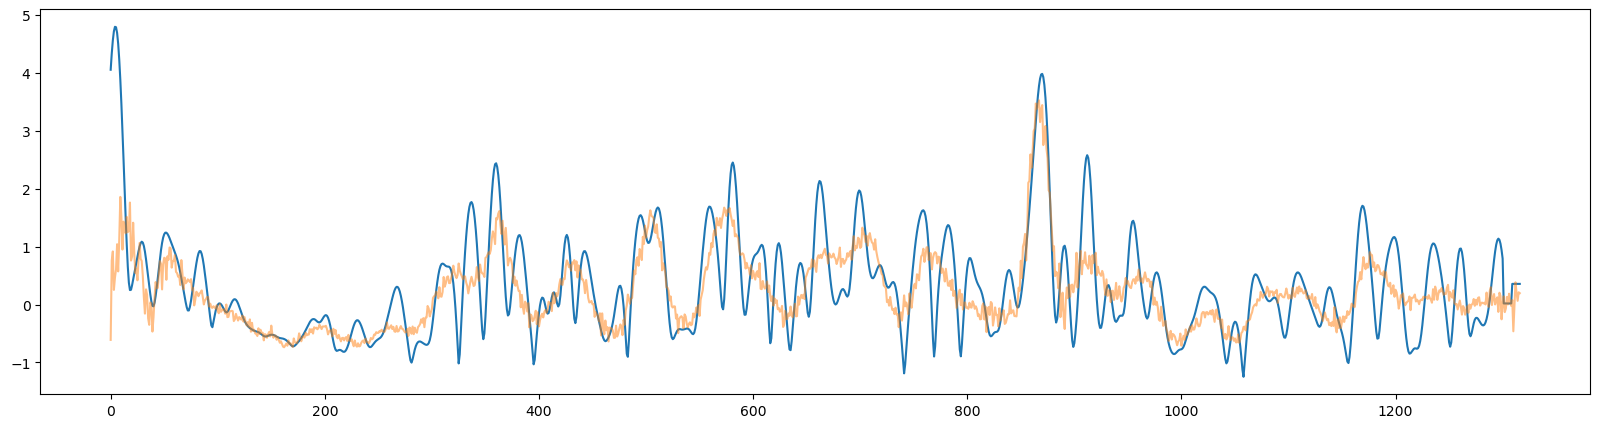

tensor([0.0000, 0.1145])


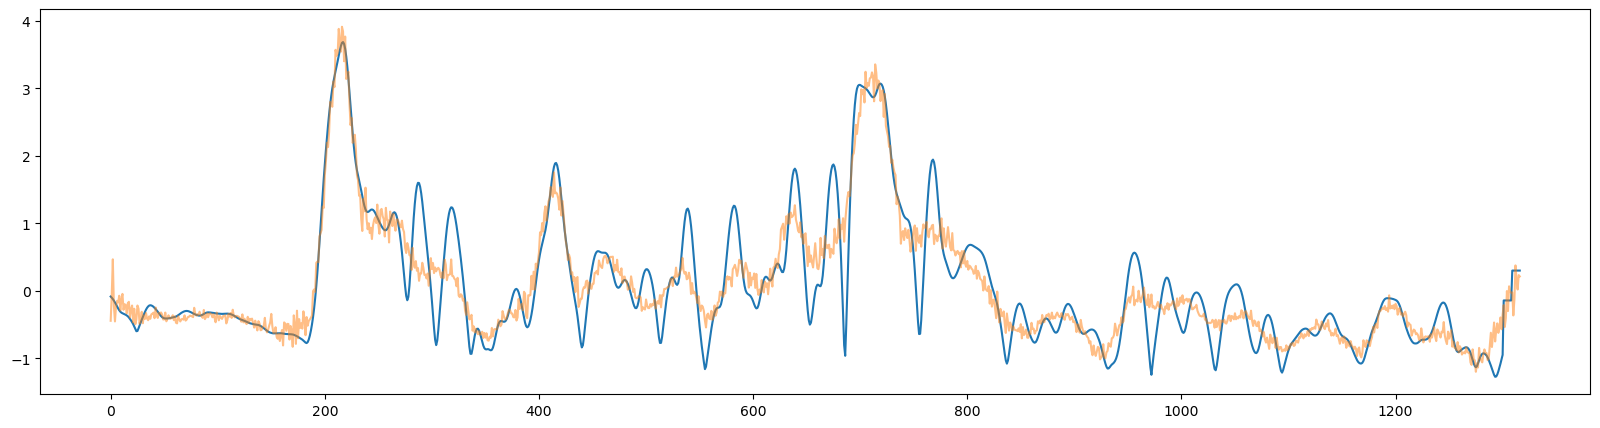

tensor([0.0000, 0.0773])


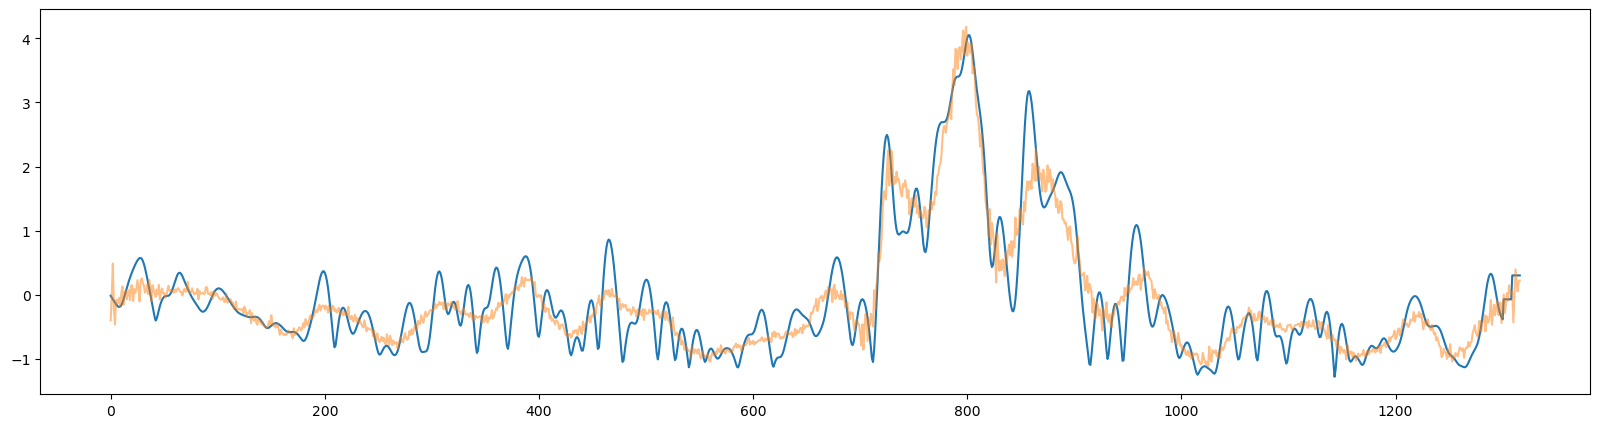

tensor([0.0000, 0.1214])


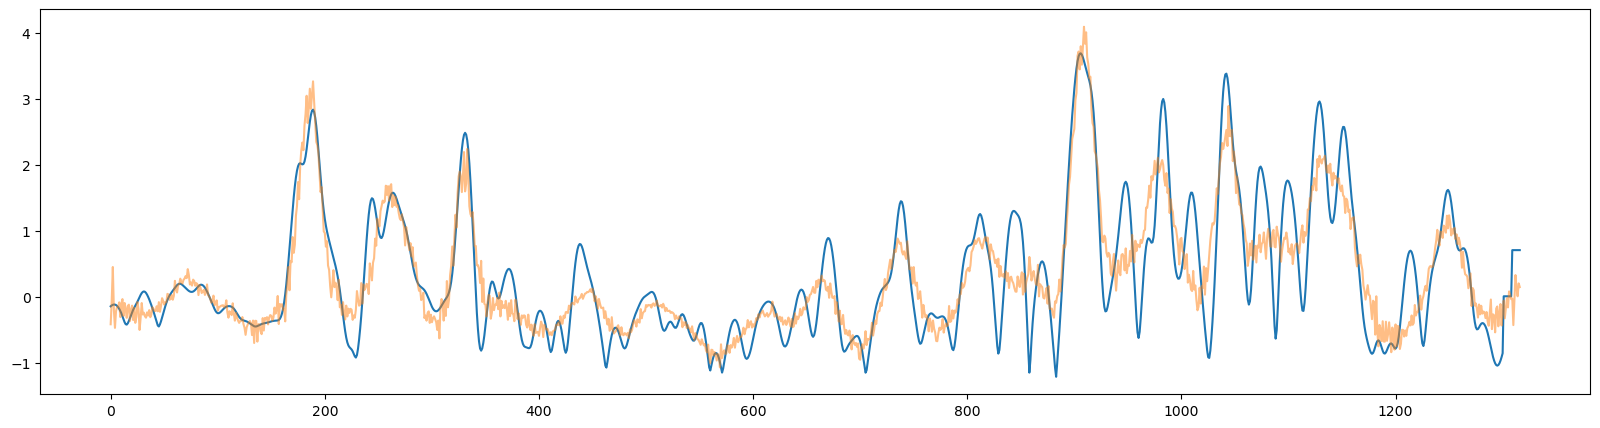

tensor([0.0000, 0.0299])


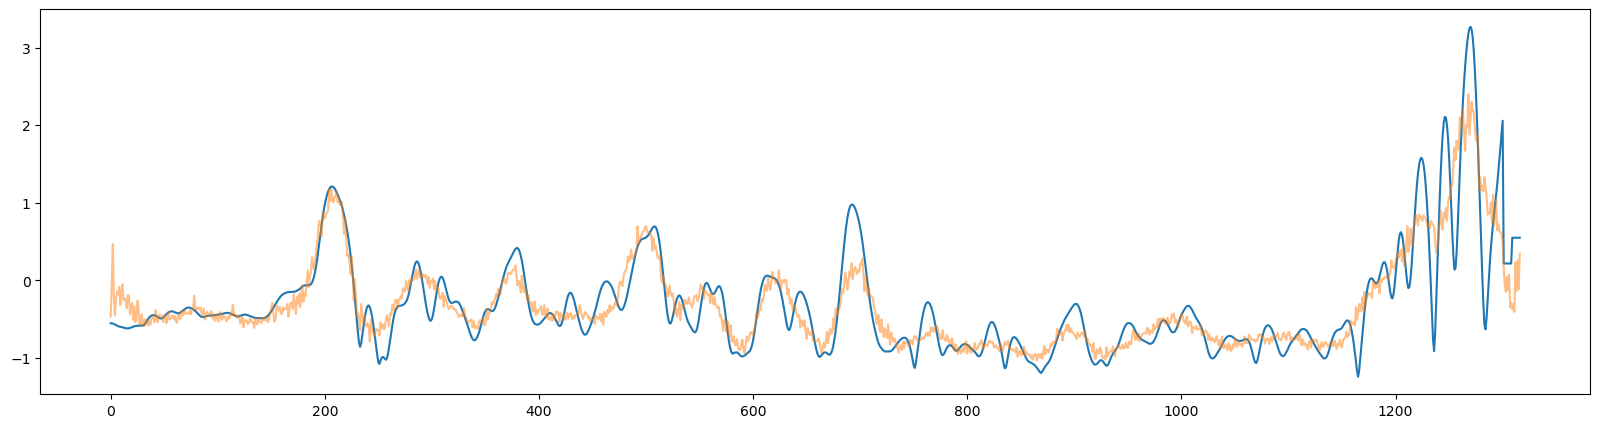

tensor([0.0000, 0.2824])


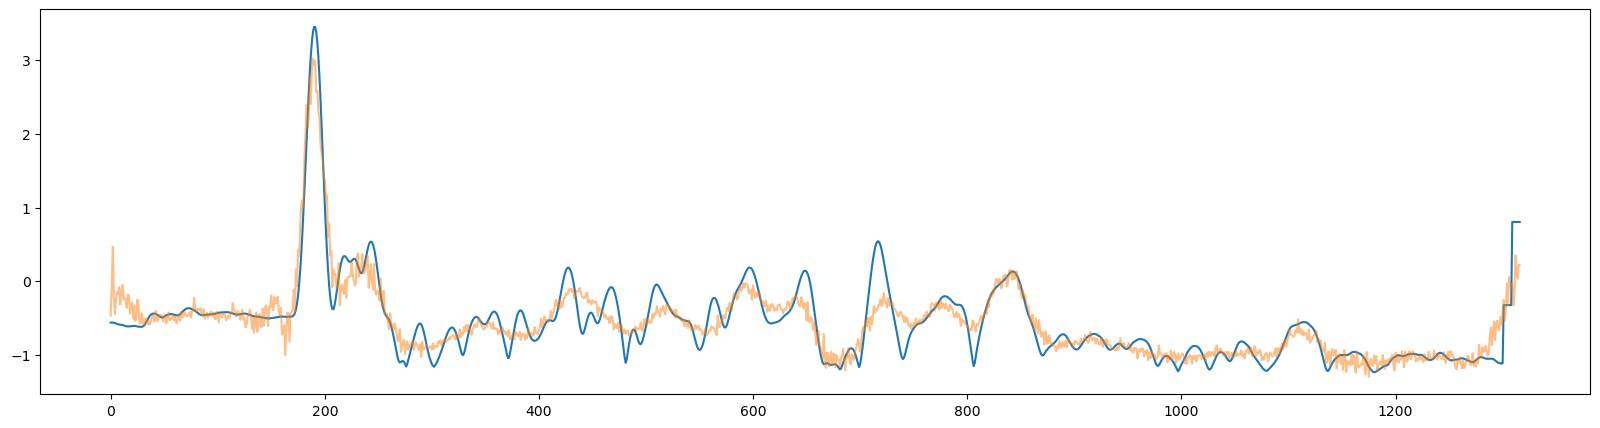

In [16]:
model = PN.ResnetEncoder(PN.BasicBlock, PN.DecodeBlock, [2, 2], 2)
model.load_state_dict(torch.load(f"{wdir}/net_PN_model"))
model.cuda()


for signals, labels in test_loader:
    
    signals = signals.to(device)
    
    labels = labels.to(device)
    
    latents = model.encode(signals)
    
    outputs = model.decode(latents)
    #move outputs back to cpu
    outputs = outputs.detach().cpu()
    signals = signals.detach().cpu()
    labels = labels.detach().cpu()
    #plt.show()
    for i in range(0, 10):
        print(labels[i])
        #plot the original signal and the reconstructed signal
        #make the plot longer
        plt.figure(figsize=(20, 5))
        plt.plot(signals[i][0])
        plt.plot(outputs[i][0], alpha=0.5)
        plt.show()

# Apply pre-trained PmPNet to identify PmP phase on real data

### Applied to a certain year

In [10]:
# read in the real data 
test_loader = PN.readin_`data_real(datadir,"ValidationData_2015",batch_size)

In [11]:
PN.netpredict(datadir,"ValidationData_2015",wdir,"net_PN_model","predict_PN_file_2015",test_loader,device)

NO.: 0   ID: 37272439   PmP_Prob: 0.323879  PmP_Time: 20.893116  dist: 127.9   evdp: 11.59   mag: 2.1  evtnm: 20151113_1204.CI.DTP
NO.: 1   ID: 37198399   PmP_Prob: 0.000000  PmP_Time: 17.361309  dist: 103.3   evdp: 18.04   mag: 2.3  evtnm: 20150705_1315.CI.SYN
NO.: 2   ID: 37150703   PmP_Prob: 0.000001  PmP_Time: 14.302899  dist: 76.6   evdp: 6.28   mag: 2.4  evtnm: 20150423_1454.CI.TOR
NO.: 3   ID: 37501608   PmP_Prob: 0.000037  PmP_Time: 13.073999  dist: 60.6   evdp: 2.31   mag: 2.2  evtnm: 20151214_0708.CI.DPP
NO.: 4   ID: 37508080   PmP_Prob: 0.000002  PmP_Time: 19.669258  dist: 111.8   evdp: 2.76   mag: 2.3  evtnm: 20151230_1027.CI.JVA
NO.: 5   ID: 37148391   PmP_Prob: 0.000000  PmP_Time: 16.840071  dist: 91.2   evdp: -0.18   mag: 2.3  evtnm: 20150420_0231.CI.HEC
NO.: 6   ID: 37305208   PmP_Prob: 0.000026  PmP_Time: 24.993418  dist: 151.4   evdp: 6.62   mag: 2.5  evtnm: 20150114_1203.CI.SYP
NO.: 7   ID: 37301936   PmP_Prob: 0.000000  PmP_Time: 26.983143  dist: 170.9   evdp: 8.30 

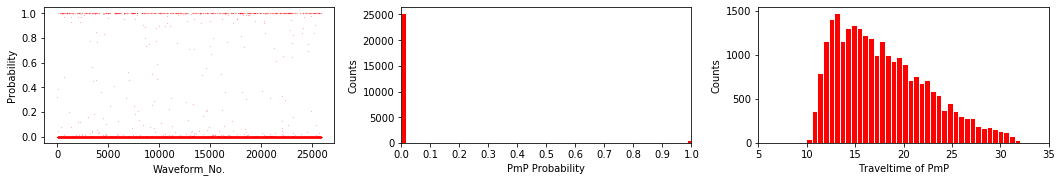

In [2]:
PN.plot_modpredict(wdir,"predict_PN_file_2015","plot_PN_predict2015")